<a href="https://colab.research.google.com/github/rat-nick/ml-lab/blob/main/Linearna-Regresija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linearna Regresija

Linearna regresija predstavlja model mašinskog učenja koji je pogodan za modelovanje linearnih odnosa medju promenjivama.
Ona predstavlja specijalan slučaj linearnog modela gde je broj nezavisnih promenjivih 1. Nezavisne promenjive su one na osnovu kojih treba dati predikciju vrednosti zavisne.

Kada je reč o linearnoj regresiji, cilj nam je da, sa što manjom greškom, predvidimo vrednost zavisne na osnovu vrednosti nezavisne promenjive.

Suštinski, model linearne regresije jeste linearna funkcija sledećeg oblika:

\begin{equation}
  y = α + βx
\end{equation}

Ova jednačina opisuje pravu sa koeficijentom pravca β i isečkom na y osi α.

Svaka tačka iz skupa podataka može biti prikazana kao
\begin{equation}
  y_i = α + βx_i + 𝜀_i
\end{equation}

gde $𝛆_i$ predstavlja grešku.

Cilj obučavanja ovog modela jeste da se nađu optimalne vrednosti parametara $α$ i $β$, takvi da, na izvestan način, minimizuju grešku.

Import neophodnih biblioteka


*   **pandas** za ucitavanje i obradu tabelarnih podataka
*   **seaborn** za crtanje grafika
*   **pyplot** za finiju kontrolu nad graficima



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Ucitavanje skupa podataka

In [ ]:
data = pd.read_csv("insurance.csv")
data.head()

## Ispitivanje korelacija izmedju promenjivih i odabir nezavisnih promenjivih za ulaz u model

In [38]:
data.corr()

<ipython-input-38-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,bmi,children,charges
age,1.000000,0.059674,0.081183,0.368224
bmi,0.059674,1.000000,-0.012619,0.806481
children,0.081183,-0.012619,1.000000,0.035945
charges,0.368224,0.806481,0.035945,1.000000


## Eksploratorna analiza

<Axes: xlabel='smoker', ylabel='charges'>

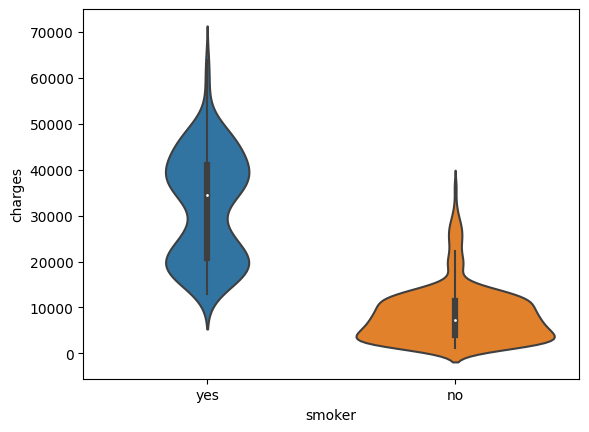

In [ ]:
data['charges'].std()
import seaborn as sns
import matplotlib.pyplot as plt

sns.box(data, x='smoker', y='charges')

## Trening test split

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)

print(len(train))
print(len(test))

219
55


## Definicija linearnog modela i treniranje

In [ ]:
from sklearn.linear_model import LinearRegression
# definicija modela
model = LinearRegression()
# treniranje (fitovanje) modela
model.fit(train[['age', 'bmi', 'children']], train['charges'])



LinearRegression()

## Testiranje modela

In [ ]:
from sklearn.metrics import mean_squared_error
import math
y_true = test['charges']
y_pred = model.predict(test[['age','bmi', 'children']])

rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print(rmse)


6606.006779748288
